#Importing modules


In [86]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf


np.random.seed(0)

# Data


In [57]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#Viewing samples

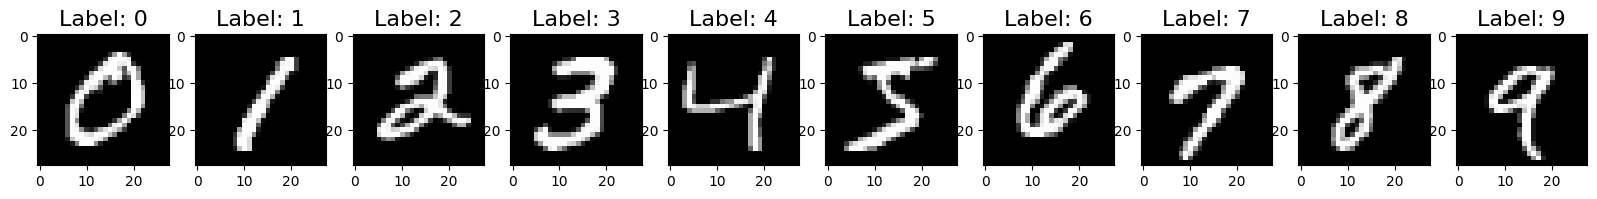

In [58]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [59]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


## Making into vectors

In [60]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [62]:
for i in range(10):
  print(y_train[i])


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#prepare data


In [63]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [72]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


#Model  - Neural Network

In [88]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               100480    
                                                                 
 dense_28 (Dense)            (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Train

In [89]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 2s 10ms/step - loss: 2.0256 - accuracy: 0.3978 - precision_5: 0.9574 - recall_4: 0.0105
Epoch 2/10
118/118 [==============================] - 1s 10ms/step - loss: 1.0110 - accuracy: 0.6997 - precision_5: 0.9124 - recall_4: 0.3928
Epoch 3/10
118/118 [==============================] - 1s 11ms/step - loss: 0.6888 - accuracy: 0.7864 - precision_5: 0.8843 - recall_4: 0.6576
Epoch 4/10
118/118 [==============================] - 1s 10ms/step - loss: 0.5619 - accuracy: 0.8310 - precision_5: 0.8916 - recall_4: 0.7606
Epoch 5/10
118/118 [==============================] - 1s 10ms/step - loss: 0.4884 - accuracy: 0.8554 - precision_5: 0.8991 - recall_4: 0.8079
Epoch 6/10
118/118 [==============================] - 1s 10ms/step - loss: 0.4390 - accuracy: 0.8696 - precision_5: 0.9052 - recall_4: 0.8337
Epoch 7/10
118/118 [==============================] - 2s 17ms/step - loss: 0.4087 - accuracy: 0.8797 - precision_5: 0.9104 - recall_4: 0.8507
Epoch 

#Evaluate (Metrics)

In [107]:
loss, accuracy, precision, recall= model.evaluate(x_test, y_test, verbose=0)
print("Test Loss: {}, Test Accuracy: {} ,Test Precision: {} ,Recall: {}".format(loss,accuracy, precision, recall))


Test Loss: 0.30628979206085205, Test Accuracy: 0.9075999855995178 ,Test Precision: 0.9300823211669922 ,Recall: 0.8925999999046326


In [96]:
y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[3.9324001e-04 2.7120482e-06 2.5196731e-04 ... 9.9381530e-01
  1.0070362e-05 4.0032524e-03]
 [3.5424707e-03 7.3873052e-05 9.5804012e-01 ... 1.0575393e-07
  1.2880568e-03 1.6671791e-08]
 [4.3170571e-06 9.8031986e-01 7.4494281e-03 ... 4.7266805e-03
  1.3526645e-03 4.2817750e-04]
 ...
 [2.5098377e-06 5.6834993e-05 5.0006303e-05 ... 4.2340532e-04
  6.9883834e-03 2.2517651e-01]
 [1.6624258e-03 1.1247093e-04 1.3035302e-04 ... 9.3816579e-06
  8.5811757e-02 5.9555192e-04]
 [1.8398072e-04 2.9420113e-08 8.9452759e-04 ... 2.0567039e-09
  4.6538044e-06 6.9718645e-08]]
[7 2 1 ... 4 5 6]


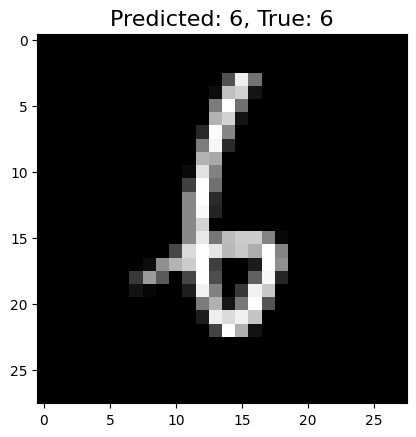

In [97]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

#Confusion Matrix

In [98]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

#plot

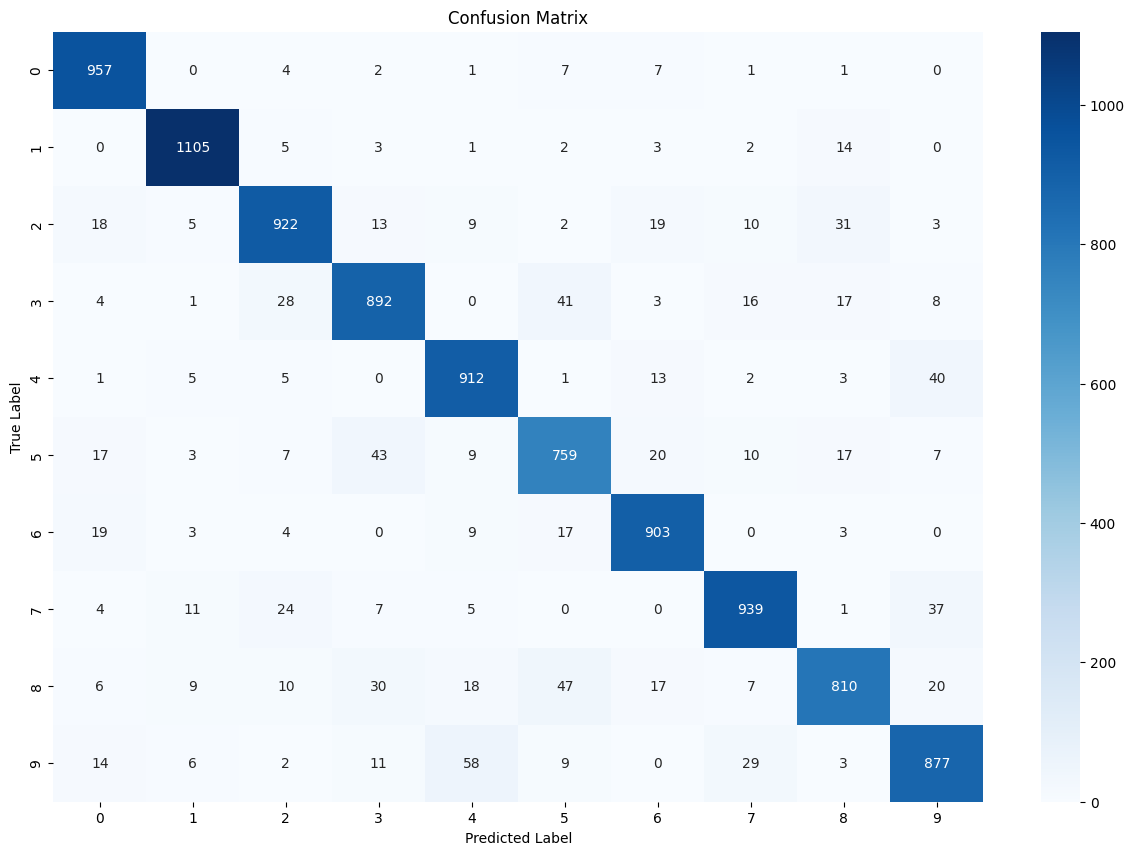

In [99]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

# Investigate Some Errors

In [105]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences

In [106]:
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

# Show Top Errors

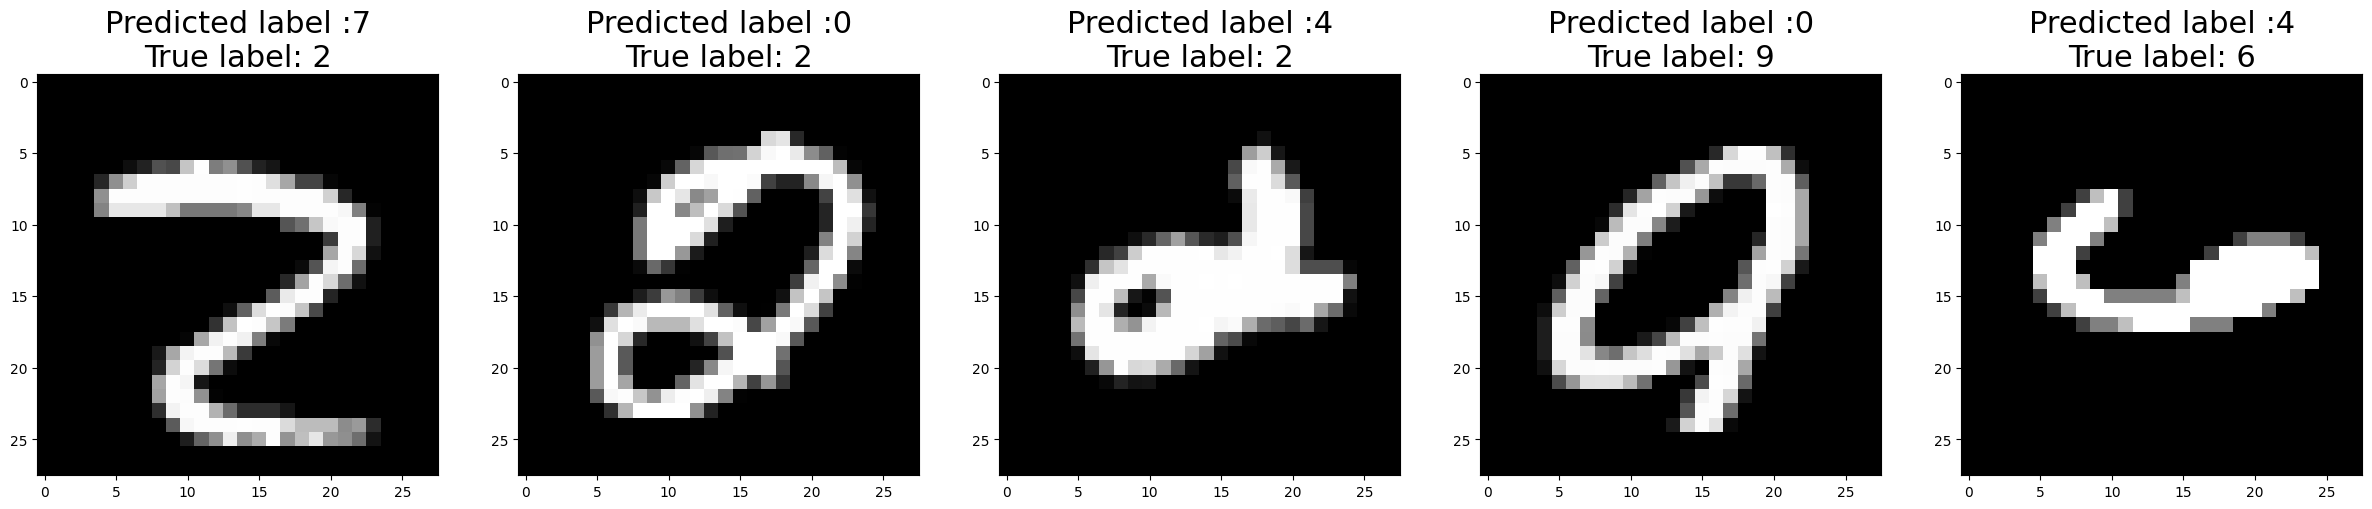

In [103]:
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)